## $\text{Coupled Probability of a PDF, }f(x) \text{, for a given } \alpha \text{ and } \kappa:$ 

# $f_{c(\alpha, \kappa)}(x) = \frac{f(x)^{(1-\frac{-\alpha \kappa}{1+m\alpha})}}{\int_{\Omega} f(x)^{(1-\frac{-\alpha \kappa}{1+m\alpha})} dx},$ 

## $\text{ where } m \text{ is the number of dimensions of } x.$

## Computing the integral $\int_{\Omega} f(x)^{1-\frac{-\alpha \kappa}{1+m\alpha}} dx$ can be difficult. Instead of computing the integral directly, we can approximate it's ratio to the unraised distribution, which I call $\rho$.

# $\rho = \frac{\int_{\Omega} f(x)^{(1-\frac{-\alpha \kappa}{1+m\alpha})} dx}{\int_{\Omega} f(x) dx} = \int_{\Omega} \frac{ f(x)^{(1-\frac{-\alpha \kappa}{1+m\alpha})}}{f(x)} dx = \int_{\Omega} f(x)^{(1-\frac{-\alpha \kappa}{1+m\alpha}-1)} dx = \int_{\Omega} f(x)^{(\frac{-\alpha \kappa}{1+m\alpha})} dx$

## Our estimator of $\rho$ is $r$.

# $r = \frac{1}{N} \Sigma^N_{i=1} f(x_i)^{(\frac{-\alpha \kappa}{1+m\alpha})},$

## $\text{ where } x_i \text{ is a random draw from the iid arbitrary conitinous distribution } X.$

## Given $\int_{\Omega} f(x) dx = 1$ because $f(x)$ is a probability density function, $r$ is an estimator of the integral used to normalize the coupled probability.

In [24]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from matplotlib import pyplot as plt
%matplotlib inline

# Set the range to integrate over.
a, b = -np.inf, np.inf
# Initialize a normal distribution.
loc, scale = 0., 1.
my_norm = norm(loc=loc, scale=scale)

# Set a power to raise the distribution by.
kappa, alpha, dim = 0.5, 1., 1
power = (1-(-alpha*kappa)/(1+dim*alpha))

def my_norm_pdf(x):
    """This a wrapper function for the PDF evaluated
    at x.
    """
    return my_norm.pdf(x)

def my_norm_pdf_raised(x):
    """This is a wrapper function for the raised PDF
    evaluated at x.
    """
    return my_norm.pdf(x) ** power

def my_norm_sample(n, seed):
    """This a wrapper function to draw random samples
    from my_norm of size n.
    """
    np.random.seed(seed)
    return my_norm.rvs(n)

def my_norm_sample_densities(n, seed):
    """This function returns the densities of a random
    sample from my_norm of size n.
    """
    return my_norm_pdf(my_norm_sample(n, seed))

def my_norm_sample_raised_densities(n, seed):
    """This function returns the raised densities of a 
    random sample from my_norm of size n.
    """
    return my_norm_pdf_raised(my_norm_sample(n, seed))

def estimate_r(n, seed):
    """This function estimates the integral of the raised
    density function.
    """
    return np.mean(my_norm_sample_densities(n, seed) ** (power-1))

## Below, I estimated the integral of a raised distribution using the estimator $r$ on random samples $x_i \overset{\text{iid}} \sim N(0, 1)$ for the sample sizes 100, 200, ..., 10,000. I repeated this process 50 times and plotted the results below against the integral of the raided density function calculated using quadrature integration.

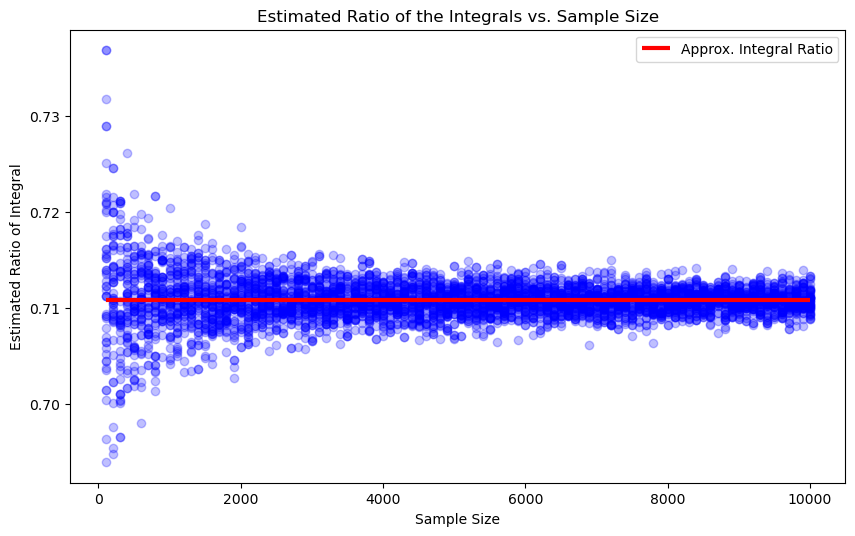

In [25]:
# Set the dimensions of a figure created in this cell.
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

# Calculate the approximate ratio of the two distributions. The denominator is 1 because it is a 
# PDF integrated over its full support.
approx_integral_ratio = quad(my_norm_pdf_raised, a, b)[0]

# Set a random seed for reproducibility.
np.random.seed(1)

# Create the samples sizes to try by picking a min n, max n, and step size between n's.
min_n, max_n, step = 100, 10000, 100
sample_sizes = np.arange(min_n, max_n+1, step)

# Set the number of simulations to run per sample size.
n_sims_per_sample_size = 50

# Create vector of all integers from 0 to 1000 inclusive to be candidates for random seeds.
potential_seeds = np.arange(0, 100000, 1)

# Run the simulations for each sample size n_sims_per_sample_size times.
for i in range(n_sims_per_sample_size):
    
    # Create an empty list that will hold this rounds mean ratios.
    mean_ratios = []
    
    # Get the mean ratios for this round for all the sample sizes.
    for n in sample_sizes:
        
        # Choose a seed from the potential seeds to be the random seeds for the round.
        seed = np.random.choice(potential_seeds, size=1)
        
        # Calculate the mean of the raised densities divided by the densities.
        mean_ratio = estimate_r(n, seed)
        
        # Add the mean ratio to the list of mean ratios.
        mean_ratios.append(mean_ratio)
    
    # Add the mean ratios to the scatter plots.
    plt.scatter(sample_sizes, mean_ratios, color="blue", alpha=0.25)

# Add a label a horizontal line for the approximate integral ratio.
plt.hlines(approx_integral_ratio, min_n, max_n, 
           colors="red", 
           label='Approx. Integral Ratio',
           linewidth=3)
plt.legend(loc="upper right")
plt.xlabel("Sample Size")
plt.ylabel("Estimated Ratio of Integral")
plt.title("Estimated Ratio of the Integrals vs. Sample Size")
plt.show()